# Programation d'un Neurone Artificiel

Je vais programmer un neurone artificiel qui sera capable de diviser un dataset en minimisant le taux d'erreur

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension de X : (100, 2)
dimension de y : (100, 1)


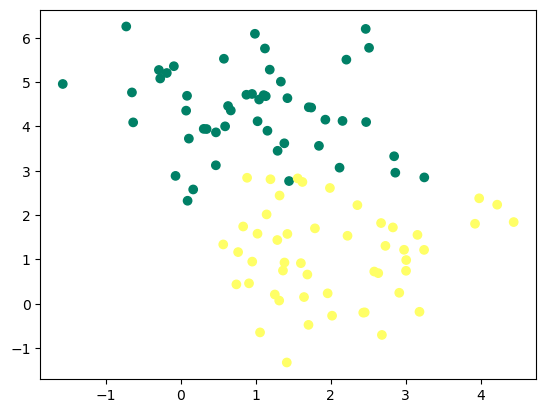

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimension de X :', X.shape)
print('dimension de y :', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap="summer")
plt.show()

## Création des fonction composant notre neurone

Je viens de traduire toute les fonction mathèmatique de la dèscente de gradiant en fonction informatique pour l'implèmenter dans notre neurone artificielle 

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [5]:
def log_loss(A, y):
    return - (1 / len(y) * np.sum(y *np.log(A) + (1 - y) * np.log(1 - A)))

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 /len(y) * np.sum(A - y)
    return (dW, db)

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

###  Création d'une fonction prédicte

Je vais crée une fonction qui nous permettra d'utiliser le model et de faire notre prèdiction

In [12]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A) #probabilité
    return A >= 0.5

## Création de notre Neurone

Je vais crée notre neurone en utilisant toute les fonctions que j'ai cré plustôt

In [9]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    #initialisation des paramètre W, b
    W, b = initialisation(X)
    
    Loss = []
    
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    # Verification de la précision de notre model    
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    
    #Affichage de la courbe d'apprentissage de notre model
    plt.plot(Loss)
    plt.show()
    
    return (W, b) #Sauvegarde des paramètre du model entrainé

0.86


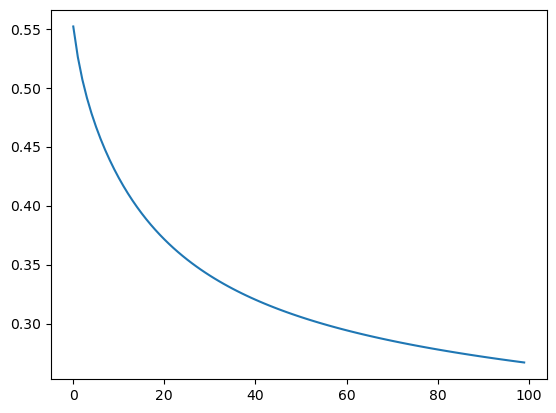

In [10]:
W, b = artificial_neuron(X, y)

## Prediction de notre modèle entrainer

maintenant que le model est entrainè je vais l'utiliser pour prédire si une novelle plante que j'ai ajoutè est toxique ou non, en tout cas la probabilité qu'elle soit toxique

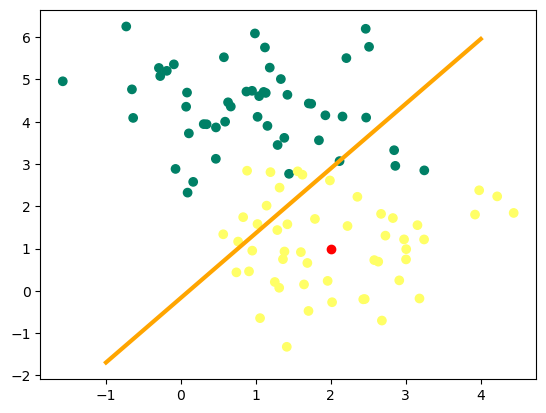

[0.85334362]


array([ True])

In [14]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = ( -W[0] * x0 -b) / W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap="summer")
plt.scatter(new_plant[0], new_plant[1], c='r', cmap="summer")
plt.plot(x0, x1, c='orange', lw=3)
plt.show()

#prédiction de la machine
predict(new_plant, W, b)

d'après la machine cette plante est dans la catégorie 1 donc cette plante est toxique ile ne faut pas la consommer
___
On peut voir aussi que la probabilité est de 85% de chance qu'elle soit toxique

___
On peut aussi voire la frontière de discision du modèle et ses erreur